### References

1.  _Denoising Diffusion Probabilistic Models_: J.Ho, A.Jain, P.Abbeel [arXiv: 2006.11239](https://arxiv.org/pdf/2006.11239.pdf)

2.  _Deep Unsupervised Learning using Nonequilibrium Thermodynamics_: J. Sohl-Dickstein et.al., [arXiv: 1503.03585](https://arxiv.org/abs/1503.03585).

3. _Improved Denoising Diffusion Probabilistic Models_: A. Nichol, P. Dhariwal [arXiv: 2102.09672](https://arxiv.org/abs/2102.09672)

4. _Understanding Diffusion Models: A Unified Perspective_: C. Luo [arXiv: 2208.11970](https://arxiv.org/abs/2208.11970).


#### More on ELBO

1. [Notes from Probabilistic PCA](https://github.com/suvoooo/Learn-TensorFlow/blob/master/TF-Proba/PCA_ProbabilisticApproach.ipynb)

2. [Latent Variable Models](https://github.com/suvoooo/Machine_Learning/blob/master/ExMax_ALgo/LVM.ipynb)


#### Markov Chain (MC)

Markov Chain (MC) refers to a stochastic process describing transitions between different states and where the probability of transitioning to any particular state is dependent solely on the current state and time elapsed.

For any positive integer $n$ and possible states $x_0, x_1, x_2, ...$ of the random variables $X_1, X_2, X_3, ...$, the Markov property is as below:

\

$$P(X_n=x_n|X_0=x_0, X_1 = x_1,...,X_{n-1}=x_{n-1}) = P(X_n=x_n|X_{n-1}=x_{n-1})$$

\


### Diffusion Math

Some notations:

$x_0$ = Image at time step zero (no noise); Coming from a data distribution $x_0 ∼ q(x_0)$.

$x_T$ = Image at final step (isotropic Gaussian Noise)

$q(x_t|x_{t-1})$ = Forward process; Given an image at time step $t-1$, returns the current image.

$p(x_{t-1}|x_t)$ = Reverse process; Takes in an image at time step $t$ and denoise it to produce current image (denoising is done via neural net; U-Net is a great choice).

So from the definition of Isotropic Gaussian Noise $p(x_T) = \mathcal{N}(x_T; 0, \textbf{I})$; The reverse process is defined as a _MC with learned Gaussian transitions_, so the joint distribution $p_{\theta}(x_{0:T})$ is defined as:

$$p_{\theta}(x_{0:T}) := p(x_T)\, \prod \limits_{t=1}^T p_\theta(x_{t-1}|x_t)\, \ldots \, (1)$$

$x_1, \ldots x_T$ are latents of the same dimensionality as the data (i.e. before and after applying noise the image size remains same) which is $x_0 \sim q(x_0)$.



Formally, given a data distribution $x_0 ∼ 𝑞(x_0)$, the forward Markov process generates a sequence of random variables $x_1, x_2, \ldots, x_𝑇$ with a transition kernel $𝑞(x_𝑡 | x_{𝑡 −1})$. Using the chain rule of probability and the Markov property we can write:

$$q(x_1, x_2, \ldots, x_T|x_0) = q(x_{1:T}|x_0) := \prod \limits_{t=1}^T q(x_t|x_{t-1}),\,  \hspace{8mm} q(x_t|x_{t-1}) := \mathcal{N}\left(x_t; \, \sqrt{1-\beta _t} x_{t-1}, \beta _t \textbf{I}\right)\, \ldots \, (2)$$

In DDPMs, the transition kernel $𝑞(x_𝑡 | x_{𝑡 −1})$ incrementally transform the data distribution $𝑞(x_0)$ into a tractable prior distribution. One typical design for the transition kernel is Gaussian perturbation i.e. noise.

$\beta$ will be some numbers between 0 and 1 i.e. $\beta \in (0, 1)$. In the DDPM paper (ref. 1) the noise schedule was linear. This was shown to be okay for images with high resolution but in the ref. 3, the authors proposed an improved learning schedule which also works for sub-optimal resolutions like $32 \times 32$. _In general $\beta _1<\beta _2<\beta _3<\ldots<\beta _T$ and as we move through each time steps the new Gaussian will have a mean close to 0_.  Thus $q(x_T|x_0) \approx \mathcal{N}(0,\, I)$




Let's define some new notations:

$\alpha _t := 1- \beta _t \, \ldots\, (3)$

$\overline{\alpha_t} := \prod \limits_{s=1}^t \alpha _s\, \ldots \, (4)$ ; Cumulative products

We know the definition for a one step forward process

$$q(x_t|x_{t-1}) := \mathcal{N}\left(x_t; \, \sqrt{1-\beta _t} x_{t-1}, \beta _t \textbf{I}\right)\, \ldots \, (5)$$

Of course we can repeat this process 1000 times to get an image at the 1000th timestep given some starting image. What if instead of repeated application of this noise, we can sample data points for any given step using only 1 step process? Let's see: Using the notations above and applying re-parametrization trick:

$$x_t = \sqrt{\alpha _t} x_{t-1} + \sqrt{1-\alpha _t}\, \epsilon\, ; \text{where}\,  \epsilon \sim \mathcal{N} (0, I)\, \& \, \alpha _t := 1- \beta _t \,\ldots\, (6)$$

---------------------------------------------------------------

**Side Note: Reparametrization Trick**

Definition

$$X\sim \mathcal{N}(\mu, \sigma ^2) = \mu + \sigma \odot \epsilon; \text{where}\,  \epsilon \sim \mathcal{N} (0, I)\, \ldots \, (7)$$

a simple explanation of this trick from the linear transformation of a normal random variable:

$$ \text{If}\, \,  X\sim \mathcal{N}(\mu, \phi ^2)\,  \text{then}, aX + b = y \sim \mathcal{N}(a\mu + b, a^2\phi^2)\, \ldots \, (8)$$

Using this relation and starting from $\epsilon$

$$\epsilon \sim \mathcal{N}(\mu = 0, \sigma^2 = I) \rightarrow \overset{a}{\sigma}  \cdot \overset{X}{\epsilon} + \overset{b}{\mu} = g \sim \mathcal{N}(\sigma * 0 + \mu, \, \sigma ^2 * I) = \mathcal{N}(\mu, \, \sigma ^2)\, \ldots \, (9)$$


---------------------------------------------------------------

$$\begin{align} x_t &= \sqrt{\alpha _t} x_{t-1} + \sqrt{1-\alpha _t}\, \epsilon\, ; \text{where}\,  \epsilon \sim \mathcal{N} (0, I) \\ x_{t-1}&= \sqrt{\alpha _{t-1}}\, x_{t-2} + \sqrt{1-\alpha _{t-1}}\, \epsilon\, \, ;\, \text{shift}\, \,  t → t-1\\ x_t &= \sqrt{\alpha _t\, \alpha _{t-1}} x_{t-2} + \sqrt{\alpha _t-\alpha _t\alpha _{t-1}}\, \epsilon\, + \sqrt{1-\alpha _{t}}\, \epsilon\, ; \text{using}\, x_{t-1}\end{align}\, \ldots \, (10)$$

Here we use two concepts;

1. Scaled random variable:  If $$  X\sim \mathcal{N}(\mu, \sigma ^2)$$ then $$k>0; kX\sim \mathcal{N}(k\mu,\, k^2\sigma ^2)$$

2. Merging two Gaussians: If we merge $\mathcal{N_1}(0, \, \sigma_1 ^2 \textbf{I})$ and $\mathcal{N_2}(0, \, \sigma_2 ^2 \textbf{I})$ then the merged distribution $\mathcal{N_m}(0, \, (\sigma _1^2 + \sigma _2^2)\textbf{I})$

Knowing that $\epsilon \sim \mathcal{N}(0, I)$; Let's just focus on the third line of Eq. 10:

$$\begin{align} x_t &= \sqrt{\alpha _t\, \alpha _{t-1}} x_{t-2} + \underbrace{\sqrt{\alpha _t-\alpha _t\alpha _{t-1}}\, \epsilon\, + \sqrt{1-\alpha _{t}}\, \epsilon}_{\text{Merge these two scaled normal distribution}}\, ;\, \epsilon \sim \mathcal{N}(0, I)\, \\ x_t &= \sqrt{\alpha _t\, \alpha _{t-1}} x_{t-2} + \sqrt{1-\alpha _t\, \alpha _{t-1}}\, \epsilon\end{align}$$

Now, we can use this, to find a generalize expression to write the noisy image $x_t$ in terms of the original image $x_0$ as below:  

$$\begin{align} x_t &= \sqrt{\alpha _t} x_{t-1} + \sqrt{1-\alpha _t}\, \epsilon\, \\  &= \sqrt{\alpha _t\, \alpha _{t-1}} x_{t-2} + \sqrt{1-\alpha _t\, \alpha _{t-1}}\, \epsilon \\ & \vdots \\ &=\sqrt{\alpha _t\, \alpha _{t-1}\, \ldots \alpha _1\, }\, x_0 \, + \, \sqrt{1-\alpha _t\, \alpha _{t-1}\, \ldots\, \alpha _{1} \,}\, \epsilon \\ &=\sqrt{\overline{\alpha _t}}\, x_0 + \sqrt{1-\overline{\alpha _t}}\, \epsilon \, ;\, \overline{\alpha_t} := \prod \limits_{s=1}^t \alpha _s\,  \\ q(x_t|x_0) &= \mathcal{N}(x_t; \, \sqrt{\overline{\alpha _t}}\, x_0,\, (1-\overline{\alpha _t})\textbf{I})\, ;\, \text{reparametrization trick!} \end{align}\,  \ldots \, (11)$$

Great! so now we have a very nice form for sampling for forward process in diffusion. With a reference to VAE, we can also think of the forward process as the data encoding step; Difference from VAE though is that in Diffusion it is a 'fixed' process and no neural network is involved;

Let's focus for a moment on the reverse process:

After the forward process has finished what we have is a latent $x_T$ which is nearly an isotropic Gaussian. If we know the exact reverse distribution $q(x_{t-1}|x_t)$, we can start sampling from the isotropic Gaussian noise $x_T\sim N(0, I)$, then we can reverse the process (denoise) ; But $q(x_{t-1}|x_t)$ is complicated to estimate and we can simply check this with the Bayes theorem;
$$q(x_{t-1}|x_t)=\frac{q(x_t|x_{t-1})\, q(x_{t-1})}{q(x_t)}$$

So $q(x_{t-1}|x_t)$ depends on the ratio $\frac{q(x_{t-1})}{q(x_t)}$, (we already know the forward process $q(x_{t}|x_{t-1})$); So we approximate $q(x_{t-1}|x_t)$ with a neural net. By the way, whenever we think about approximating one distribution with another your mind should already head towards KL divergence and possibly variational lower bound (evidence lower bound/ELBO).

As we said before, the reverse process is defined as an _MC with **LEARNED** Gaussian transitions_ and a single step for the reverse process then could be written as:

$$p(x_{t-1}|x_{t}) := \mathcal{N}\left(x_{t-1}; \mu _{\theta}(x_t, t), \, Σ_{θ}(x_t, t)\right)\, \ldots \, (12)$$

where $\mu _{\theta}, \Sigma _{\theta} $; the mean and variance (co-variance matrix for multi-variate normal) are parametrized and learned (neural-net comes here). Now $\Sigma _\theta(x, t)$ is fixed to a certain variance schedule. In the DDPM paper the authors state that taking $\Sigma _\theta(x, t)=\sigma _t^2 \mathbf{I}$ and setting $$\Sigma _\theta(x, t)=\sigma _t^2 \mathbf{I}; \rightarrow σ_t^2 = \beta _t\, ; \, \text{or} \, σ_t^2 = \tilde{β_t} = \frac{1-\bar{\alpha} _{t-1}}{1-\bar{\alpha _t}}\beta _t\, \ldots \, (13)$$  

had similar results. At this point we can compare the Diffusion model to a VAE, where the forward process can be compared to the encoding and the reverse process can be compared with the decoding. But in Diffusion by definition the forward process is fixed, so we need to train only 1 network; whereas in VAE we need to train both the encoder and decoder jointly. This also aligns at this stage very well with the derivation of loss function and that's also similar to VAE; LVMs which we have discussed [before](https://medium.com/towards-data-science/latent-variables-expectation-maximization-algorithm-fb15c4e0f32c) in the context of GMM, usually go hand in hand with the ELBO.  

So we only need a network to predict $\mu _{\theta}$. Now what we would like to minimize would be $-\log \, p_{\theta}(x_0)$; But this is not easy to compute and the reason for that is $x_0$ would depend on all other time-steps $x_1, x_2, \ldots\, x_T$, very specifically we need to perform an intractable integration
$$p_{\theta}(x_0) := \int p_{\theta }(x_{0:T})\, dx_{1:T}$$
and ELBO comes into play;

We use the definition of ELBO to set the bound on $\log \, p_{\theta}(x_0)$; You can see the derivation for ELBO [here](https://github.com/suvoooo/Learn-TensorFlow/blob/master/TF-Proba/PCA_ProbabilisticApproach.ipynb); but if we want to approximate the true posterior $p(z|x)$ with a simpler distribution $q(z|x)$ then ELBO is:

$$\text{ELBO} = \mathbb{E}_{q(z|x)}[\log p(x, z)] - \mathbb{E}_{q(z|x)}[\log q(z|x)];\,  \, \log p(x)\geq \mathbb{E}_{q(z|x)}\left[\frac{\log p(x, z)}{\log q(z|x)}\right]=\text{ELBO}\, \ldots\,  (14)$$

This can also be written using a KL divergence term:

$$\begin{align}\text{ELBO} &= \mathbb{E}_{q(z|x)}[\log p(x, z)] - \mathbb{E}_{q(z|x)}[\log q(z|x)] \\ &= \mathbb{E}_{q(z|x)}[\log p(x|z)\, \log p(z)] - \mathbb{E}_{q(z|x)}[\log q(z|x)] \\  &= \mathbb{E}_{q(z|x)}[\log p(x|z)] +  \mathbb{E}_{q(z|x)}[\log p(z)] - \mathbb{E}_{q(z|x)}[\log q(z|x)] \\ &= \mathbb{E}_{q(z|x)}[\log p(x|z)] - \int q(z|x)\, \log \frac{q(z|x)}{p(z)}\\ &= \mathbb{E}_{q(z|x)}[\log p(x|z)] - \text{KL}(q(z|x)|| p(z))\end{align}\, $$


$$\text{ELBO} = \mathbb{E}_{q(z|x)}[\log p(x|z)] - \text{KL}(q(z|x)|| p(z))\, \ldots (15)$$

We will use the expression above for deriving the loss function; So in the diffusion model $x_0$ (the original image) will represent the true data and $x_1, \ldots x_T$ are the latent variables i.e. $x_{1:T}$; so let's use this in above expression:

$$\begin{align} \text{ELBO} &= \mathbb{E}_{q(x_{1:T}|x_0)}[\log p(x_0|x_{1:T})] - \text{KL}(q(x_{1:T}|x_0)|| p(x_{1:T})) \\ &= \mathbb{E}_{q}[\log p(x_0|x_{1:T})] - \mathbb{E}_q\left[\log\frac{q(x_{1:T}|x_0)}{p(x_{1:T})}\right] \\ &= \mathbb{E}_{q}\left[\log p(x_0|x_{1:T}) + \log\frac{p(x_{1:T})}{q(x_{1:T}|x_0)}\right] \\ &= \mathbb{E}_q \left[\log\frac{p(x_{0:T})}{q(x_{1:T}|x_0)}\right]\end{align}\, \ldots \, (16)$$

Here we can use the definition of $p(x_{0:T})$ and $q(x_{1:T})$ from Eq. (1) and (2)

$$\begin{align} \text{ELBO} &= \mathbb{E}_q \left[\log\frac{p(x_{0:T})}{q(x_{1:T}|x_0)}\right] \\ &= \mathbb{E}_q \left[\log\frac{p(x_T)\, \prod \limits_{t=1}^T p_\theta(x_{t-1}|x_t)}{\prod \limits_{t=1}^T q(x_t|x_{t-1})}\right] \\ &= \mathbb{E}_q \left[\log p(x_T) + \sum \limits_{t≥1} \log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_t|x_{t-1})}\right] \\ &= \mathbb{E}_q \left[\log p(x_T) + \sum \limits_{t≥2} \log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_t|x_{t-1})} + \log \, \frac{p_\theta(x_{0}|x_1)}{ q(x_1|x_{0})}\right]  \end{align} \, \ldots \, \, \, (17)$$

We apply Bayes Theorem here to further modify this:

$$q(x_{t}|x_{t-1}) = \frac{q(x_{t-1}|x_{t}) \, q(x_t)}{q(x_{t-1})}\, \ldots \, (18)$$

But the terms on the right have high variance because we it's very difficult to know what was actually the original image because we are starting from an isotropic Gaussian Noise. So the authors conditioned them also with the original image i.e. $x_0$

$$q(x_{t}|x_{t-1}) = \frac{q(x_{t-1}|x_{t}, x_0) \, q(x_t|x_0)}{q(x_{t-1}|x_0)}\, \ldots \, (19)$$

Let's plug this above:  


$$\begin{align} \text{ELBO} &= \mathbb{E}_q \left[\log p(x_T) + \sum \limits_{t≥2} \log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}\, \cdot  \frac{q(x_{t-1}|x_0)}{q(x_t|x_0)}+ \log \, \frac{p_\theta(x_{0}|x_1)}{ q(x_1|x_{0})}\right] \\ &= \mathbb{E}_q \left[\log p(x_T) + \sum \limits_{t≥2} \log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}\, +  \sum \limits_{t≥2} \log \, \frac{q(x_{t-1}|x_0)}{q(x_t|x_0)}+ \log \, \frac{p_\theta(x_{0}|x_1)}{ q(x_1|x_{0})}\right] \end{align}\, \ldots \, (20)$$

Let's focus on this term $\sum \limits_{t≥2} \log \, \frac{q(x_{t-1}|x_0)}{q(x_t|x_0)}$ with an example when say $T=5$

$$\begin{align}\sum \limits_{t≥2}^5 \log \, \frac{q(x_{t-1}|x_0)}{q(x_t|x_0)} &= \log \, \frac{q(x_{1}|x_0)}{q(x_2|x_0)} + \log \, \frac{q(x_{2}|x_0)}{q(x_3|x_0)} + \log \, \frac{q(x_{3}|x_0)}{q(x_4|x_0)} + \log \, \frac{q(x_{4}|x_0)}{q(x_5|x_0)}\\ &= \log \, \frac{q(x_1|x_0)\, q(x_{2}|x_0)\, q(x_{3}|x_0)\, q(x_{4}|x_0)}{q(x_{2}|x_0)\, q(x_{3}|x_0)\, q(x_{4}|x_0)\, q(x_{5}|x_0)}\\ &= \log \frac{q(x_1|x_0)}{q(x_5|x_0)}\end{align}$$

Grreattt! Let's use this:

$$\begin{align} \text{ELBO} &= \mathbb{E}_q \left[\log p(x_T) + \sum \limits_{t≥2} \log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}\, +  \sum \limits_{t≥2} \log \, \frac{q(x_{t-1}|x_0)}{q(x_t|x_0)}+ \log \, \frac{p_\theta(x_{0}|x_1)}{ q(x_1|x_{0})}\right] \\ &= \mathbb{E}_q \left[\log p(x_T) + \sum \limits_{t≥2} \log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}\, +  \log \, \frac{q(x_1|x_0)}{q(x_T|x_0)} + \log \, \frac{p_\theta(x_{0}|x_1)}{ q(x_1|x_{0})}\right] \end{align}\, \ldots \,$$


We proceed again with logarithm product rules:

$$\begin{align} \text{ELBO} &= \mathbb{E}_q\left[\log p(x_T) + \sum \limits_{t≥2} \log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}\, + \log \, \frac{p_\theta(x_{0}|x_1)}{ q(x_T|x_{0})} \right] \\ &= \mathbb{E}_q \left[\underbrace{\log \, \frac{p(x_T)}{q(x_T|x_{0})}}_{L_T} \, +\,  \sum \limits_{t≥2} \underbrace{\log \, \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}}_{L_{t-1}}\, +\, \underbrace{\log \, p_\theta(x_{0}|x_1)}_{L_0}\right] \end{align}\, \ldots \, (21)$$

Let's look at the first term; it compares $p(x_T)$ and $q(x_T|x_0)$; by definition the forward process is pre-defined and the final $x_T$ is a pure Gaussian; So this term is essentially parameter free; and we can completely ignore this. Also this term would be close to zero because $q(x_T|x_0) \approx \mathcal N(0, I)$, similar to $p(x_T)$.

The second term where we compare the true reverse process $q(x_{t-1}|x_t, x_0)$ (conditioned on $x_0$) and the parametrized one $p_{\theta}(x_{t-1}|x_t)$ has a caveat. First of all, we do this at every time-step. Secondly, on [Lilian's blog](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) it's shown extensively that $q(x_{t-1}|x_t, x_0)$ is tractable when it is conditioned on the original datapoint and it is a Gaussian.

$$q(x_{t-1}|x_t)=N (x_{t−1}; \tilde{μ}_t(x_t, x_0), \, \tilde{β}_tI); \, \\ \text{where} \, \, \tilde{\mu} := \frac{\sqrt{\overline{α}_{t−1}}β_t}{1 − \bar{α}_t}\, x_0 + \frac{\sqrt{α}_t(1 − \bar{α}_{t−1})} {1 − \bar{α}_t}\, x_t; \, \, \tilde{\beta _t} = \frac{1 − \bar{α}_{t−1}} {1 − \bar{α}_t}\, \beta _t\, \ldots (22)$$

By definition $p(x_{t-1}|x_{t})$ is Gaussian from Eq. 1. So we are basically comparing two Gaussian distributions for the 2nd term in equation (21).

Let's look at the $\tilde{\beta}$ term,  it only depends on the learning rate schedule and not on the input images. So our focus now falls on the $\tilde{\mu}$.

What we would like our network to do is to predict $\mu_{\theta}(x_t, t)$ from Eq. 12 to be as close as $\tilde{\mu}$. Let's simplify the $\tilde{\mu}$ term a bit more to get rid off the dependency on the original image $x_0$. For this we use hint from Eq. 11

$$x_t = \sqrt{\bar{\alpha _t}}x_0 + \sqrt{1-\bar{\alpha _t}}ϵ \rightarrow x_0 = \frac{1}{\sqrt{\bar{\alpha _t}}}(x_t - \sqrt{1-\bar{\alpha _t}}ϵ)$$

Using this in Eq. 22 for $\tilde{\mu}$

$$\tilde{\mu} = \frac{1}{\sqrt{\alpha _t}}\left(x_t - \frac{\beta _t}{\sqrt{1-\bar{\alpha _t}}}ϵ \right)\, \ldots \, (23)$$

----------------------------------------------------

The steps are not so obvious so let's do the steps:

$$\begin{align} \tilde{\mu} &:= \frac{\sqrt{\overline{α}_{t−1}}β_t}{1 − \bar{α}_t}\, x_0 + \frac{\sqrt{α}_t(1 − \bar{α}_{t−1})} {1 − \bar{α}_t}\, x_t; \, \, \\ &= \frac{\sqrt{\overline{α}_{t−1}}β_t}{1 − \bar{α}_t}\, \frac{1}{\sqrt{\bar{\alpha _t}}}(x_t - \sqrt{1-\bar{\alpha _t}}ϵ) \, +\, \frac{\sqrt{α}_t(1 − \bar{α}_{t−1})} {1 − \bar{α}_t}\, x_t \\ &= \frac{\beta _t}{1-\bar{\alpha}_t}\frac{1}{\sqrt{\alpha _t}} \, (x_t - \sqrt{1-\bar{\alpha _t}}ϵ) \, +\, \frac{\sqrt{α}_t(1 − \bar{α}_{t−1})} {1 − \bar{α}_t}\, x_t \\ &= \frac{1}{\sqrt{\alpha _t}} \left(\frac{1-\alpha _t}{1-\bar{\alpha}_t} \, x_t - \frac{1-\alpha _t}{\sqrt{1-\bar{\alpha}_t}}\beta _t \epsilon \right) + \frac{\sqrt{\alpha _t}}{1- \bar{\alpha _t}}x_t - \frac{\sqrt{\alpha _t} \, \bar{\alpha}_{t-1}}{1-\bar{\alpha _t}}x_t  \\ &= \frac{\sqrt{\alpha _t} \, +\,  \frac{1-\alpha _t}{\sqrt{\alpha _t}}\, -\, \sqrt{\alpha _t} \, \bar{\alpha}_{t-1}}{1-\bar{\alpha _t}}x_t \, -\, \frac{1-\alpha _t}{\sqrt{1-\bar{\alpha _t}}}\, \frac{\beta _t \epsilon}{\sqrt{\alpha _t}} \\ &= \frac{\alpha _t + 1 - \alpha _t - \alpha _t\, \bar{\alpha} _{t-1} }{\sqrt{\alpha _t}\left(1-\bar{\alpha _t}\right)}x_t -\, \frac{1-\alpha _t}{\sqrt{1-\bar{\alpha _t}}}\, \frac{\beta _t \epsilon}{\sqrt{\alpha _t}} \\ &= \frac{1-\bar{\alpha} _t}{\sqrt{\alpha _t}\left(1-\bar{\alpha _t}\right)}x_t - \, \frac{1-\alpha _t}{\sqrt{1-\bar{\alpha _t}}}\, \frac{\beta _t \epsilon}{\sqrt{\alpha _t}} \\ &= \frac{1}{\sqrt{\alpha _t}}\left(x_t - \frac{1-\alpha _t}{\sqrt{1-\bar{\alpha _t}}}\, \beta _t\, \epsilon \right)\end{align}$$

-----------------------------------------------

This is really cool! Because in ideal case this what our network is trying to achieve which we can think about subtracting noise (random scaled) from the image at the current step. We have already described that the authors fixed the covariance for the parametrized Normal distribution $(p_{\theta}(x_{t-1}|x_t))$ to be $\tilde{\beta}$. If we write the normal distributions $p_{\theta}(x_{t-1}|x_{t}):=\mathcal{N}(\mu _{\theta}(x_t, t)), \,\,  q(x_{t-1}|x_{t}) := \mathcal{N}(\tilde{\mu _t}(x_t. t))$ in the exponential form and take the logarithm $\log \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}\,$ we would get it as mean squared error; So for a particular $t$, the 2nd term in Eq. 21 would look as below:

$$p_{\theta}(x_{t-1}|x_{t}):=\mathcal{N}(\mu _{\theta}(x_t, t)), \,\,\,   q(x_{t-1}|x_{t}) := \mathcal{N}(\tilde{\mu _t}(x_t, t))$$

\

$$\mathbb{E}_q \left[\log \frac{p_\theta(x_{t-1}|x_t)}{ q(x_{t-1}|x_{t}, x_0)}\right]\, = \mathbb{E}_q \left[L_{t-1}\right] = \mathbb{E}_q \left[\frac{1}{2\sigma _t^2}\left||\tilde{\mu _t}(x_t, x_0) - \mu _{\theta}(x_t, x_0) |\right|^2 \right] + C\, \ldots \, (24)$$

Once again: **_Our network is trying to predict the posterior mean of the forward process_**

We can further simplify the Eq. 24 to reach even more meaningful conclusion; Since the posterior mean of the forward process is of the form given in Eq. 23, and $x_t$ is available during training, so we focus only on the noise term $ϵ$. First we parametrize $\mu _{\theta}$ in the form of $\tilde{\mu}$

$$\mu_{\theta} = \frac{1}{\sqrt{\alpha _t}}\left(x_t - \frac{\beta _t}{\sqrt{1-\bar{\alpha _t}}}ϵ_{\theta}(x_t, t) \right)\, \ldots \, (25)$$


Let's use these and put it back in Eq. 24

$$\begin{align} L_{t-1} &= \mathbb{E}_{x_0, ϵ} \left[\frac{1}{2\sigma _t^2}\left|\left| \frac{1}{\sqrt{\alpha _t}}\left(x_t - \frac{\beta _t}{\sqrt{1-\bar{\alpha _t}}}ϵ \right)\, \, - \frac{1}{\sqrt{\alpha _t}}\left(x_t - \frac{\beta _t}{\sqrt{1-\bar{\alpha _t}}}ϵ_{\theta}(x_t, t) \right)\, \right|\right|^2 \right] \\ &= \mathbb{E}_{x_0, ϵ} \left[\frac{1}{2\sigma _t^2}\left|\left| \frac{1}{\sqrt{\alpha _t}}\,  \left(\frac{\beta _t}{\sqrt{1-\bar{\alpha _t}}}\right) \left(ϵ  \,  -\,  ϵ_{\theta}(x_t, t) \right)\, \right|\right|^2 \right] \\ &= \mathbb{E}_{x_0, \epsilon} \left[\frac{1}{2\sigma _t^2} \, \frac{\beta _t ^2}{{\alpha _t}\, (1-\bar{\alpha _t})}\,\left|\left|    \left(ϵ  \,  -\,  ϵ_{\theta}(x_t, t) \right)\, \right|\right|^2 \right] \end{align}\, \ldots \, (26)$$


_Here everything boils down to find the squared difference between predicted noise at time $t$ and actual noise._

The authors also found that the training gets better if we completely neglect the weight term.

$$L_{t-1} = \mathbb{E}_{x_0, \epsilon} \left[\left|\left|    \left(ϵ  \,  -\,  ϵ_{\theta}(x_t, t) \right)\, \right|\right|^2 \right]\, \ldots \, (27)$$


Also using Eq. 25 in the definition of $p_{\theta}(x_{t-1}|x_t)$ in Eq. 12, we can write

$$p(x_{t-1}|x_{t}) := \mathcal{N}\left(x_{t-1}; \frac{1}{\sqrt{\alpha _t}}\left(x_t - \frac{\beta _t}{\sqrt{1-\bar{\alpha _t}}}ϵ_{\theta}(x_t, t) \right), \, \, Σ_{θ}(x_t, t)\right)\, \ldots \, (12.1)$$

Finally sampling $x_{t-1}$ can be written using a reparametrization trick:

$$x_{t-1} = \frac{1}{\sqrt{\alpha _t}}\left(x_t - \frac{\beta _t}{\sqrt{1-\bar{\alpha}_t}}\, ϵ_{\theta}(x_t, t)\right) + \sigma _t z; \, \, z\sim \mathcal {N}(0, I)\, \ldots \, (28)$$

What about the final term in Eq. 21 $\log \, p_{\theta}(x_0|x_1)$?

First the authors scale the images (pixel values between [0, 1]) to [-1, 1] to make it consistent from the very early step of the reverse process $p(x_T)$, where the sampling starts from a uniform Gaussian with zero mean and unit variance. The authors then define


$$\begin {align} & p_{\theta}(x_0|x_1) = \prod \limits _{1}^D \int \limits_{\delta_{-}\left( x_0^i \right)}^{\delta_{+} \left(x_0^i \right)} \, \mathcal{N}(x; \, \mu _{\theta}^i(x_1, 1), \, \sigma _1^2)\\ & \delta _+(x)=\begin{cases}
    \infty ,& \text{if } x= 1\\
    x+\frac{1}{255},              & \text{if } x< 1
\end{cases}; \, \, \, \delta _-(x)=\begin{cases}
    -\infty ,& \text{if } x= -1\\
    x-\frac{1}{255},              & \text{if } x>- 1
\end{cases}\, \end{align}\, \ldots \, (29)$$

here $D$ is the data dimensionality (given an image, $D$ is total number of pixels in that image). The $\delta _+, \, \delta _-$ indicates that we integrate around the range of the original pixel value $(x_0^i)$. If the $\mu_{\theta}^i$ is actually close to the mean value of the pixel then the integration result would be large (assuming that prediction is good for all other pixels). Let's see a code block below: We know at the start $\beta$ is very low $10^{-4}$ and say within an image $(x_0)$ the pixel value is $87/255$ and we add noise in the first step and the pixel value is now $89/255$, our denoising network try to undo the process and predicts the pixel value to be $\mu_{x_1, 1} = 88/255$ if it's good or $\mu_{x_1, 1} = 93/255$ if it is bad. So first we think about a normal distribution with mean $\mu_{x_1, 1}$ at the predicted value and our integration limits would be $\pm 1$ around the true pixel value i.e. $87/255$, so our limits would be: $[87/255 - 1/255, 87/255 + 1/255]$;  


Eventually the authors decided to get rid of this term and finally we get to the loss as

$$\begin{align} L_{\text{simple}} &:= \mathbb{E}_{t, x_0, \epsilon} \left[\left|\left|    \left(ϵ  \,  -\,  ϵ_{\theta}(x_t, t) \right)\, \right|\right|^2 \right]\\ &= \mathbb{E}_{t, x_0, \epsilon} \left[\left|\left|    \left(ϵ  \,  -\,  ϵ_{\theta}(\sqrt{\overline{\alpha _t}}\, x_0 + \sqrt{1-\overline{\alpha _t}}\, \epsilon \, ,\, t) \right)\, \right|\right|^2 \right] \end{align}\, \ldots (30)$$

Where we have just use the definition of $x_t$ from Eq. 11.


Finally, the authors highlight that for their diffusion process setup, downweight the loss term in Eq. 30 for small values of $t$, i.e. when noise is small. This is beneficial because the network then learns to focus more on the difficult denoising task at higher values of $t$. The reweighting of the objective function (Eq. 30) leads to better sampling.

Area under the curve between x_l and x_h for good prediction: 0.2836
Area under the curve between x_l and x_h for bad prediction: 0.0219


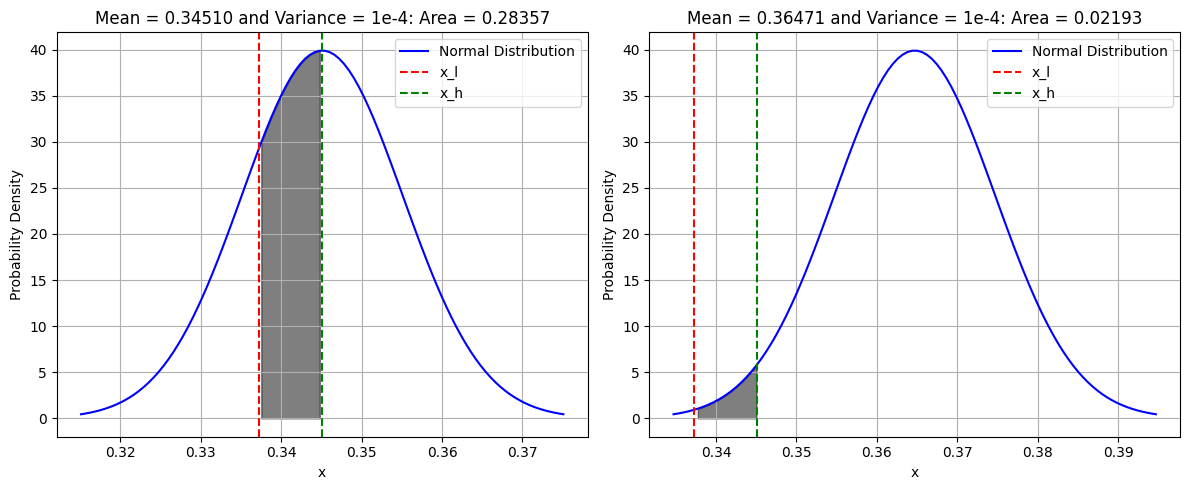

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given mean and variance
mean_good = 88 / 255
mean_bad = 93/255

variance = 1e-4

# Standard deviation (sigma) is the square root of the variance
std_dev = np.sqrt(variance)

# Define the range for x values
x_g = np.linspace(mean_good - 3 * std_dev, mean_good + 3 * std_dev, 100)
x_b = np.linspace(mean_bad - 3 * std_dev, mean_bad + 3 * std_dev, 100)

# Calculate the corresponding probabilities (PDF) for each x
def pdf(x, mean, std):
  pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
  return pdf

good_pdf = pdf(x_g, mean_good, std_dev)
bad_pdf = pdf(x_b, mean_bad, std_dev)

### good preds
x_l_t = 86/255
x_h_t = 88/255



# Calculate the cumulative distribution function (CDF) for x_l and x_h
cdf_x_l_g = norm.cdf(x_l_t, mean_good, std_dev)
cdf_x_h_g = norm.cdf(x_h_t, mean_good, std_dev)

cdf_x_l_b = norm.cdf(x_l_t, mean_bad, std_dev)
cdf_x_h_b = norm.cdf(x_h_t, mean_bad, std_dev)

# Calculate the area under the curve between x_l and x_h
area_under_curve_g = cdf_x_h_g - cdf_x_l_g
area_under_curve_b = cdf_x_h_b - cdf_x_l_b

print(f"Area under the curve between x_l and x_h for good prediction: {area_under_curve_g:.4f}")
print(f"Area under the curve between x_l and x_h for bad prediction: {area_under_curve_b:.4f}")


# Plot the normal distribution
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.plot(x_g, good_pdf, label='Normal Distribution', color='blue')
plt.fill_between(x_g, good_pdf, 0, where=((x_g >= x_l_t) & (x_g <= x_h_t)), color='black', alpha=0.5)

# Add vertical lines at x_l and x_h

plt.axvline(x_l_t, color='red', linestyle='--', label='x_l')
plt.axvline(x_h_t, color='green', linestyle='--', label='x_h')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Mean = %3.5f and Variance = 1e-4: Area = %3.5f'%(mean_good, area_under_curve_g))
plt.legend()
plt.grid(True)
fig.add_subplot(122)
plt.plot(x_b, bad_pdf, label='Normal Distribution', color='blue')
plt.fill_between(x_b, bad_pdf, 0, where=((x_b >= x_l_t) & (x_b <= x_h_t)), color='black', alpha=0.5)

# Add vertical lines at x_l and x_h

plt.axvline(x_l_t, color='red', linestyle='--', label='x_l')
plt.axvline(x_h_t, color='green', linestyle='--', label='x_h')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Mean = %3.5f and Variance = 1e-4: Area = %3.5f'%(mean_bad, area_under_curve_b))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
